In [83]:
import keras
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical

Train images shape: (60000, 28, 28), Train labels shape: (60000,)
Test images shape: (10000, 28, 28), Test labels shape: (10000,)
Number of classes: 10, Classes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


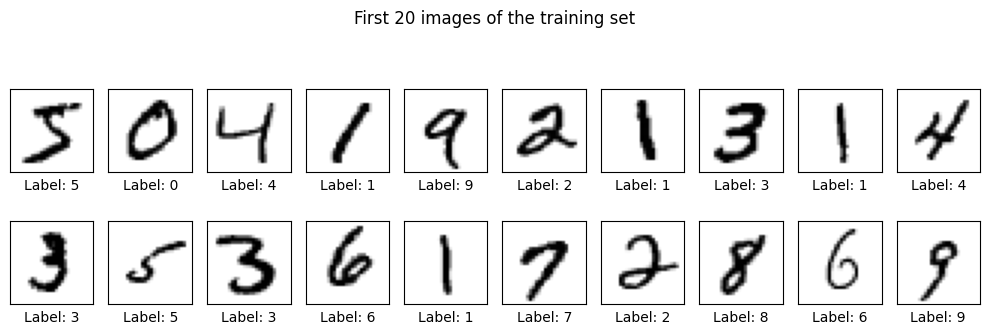

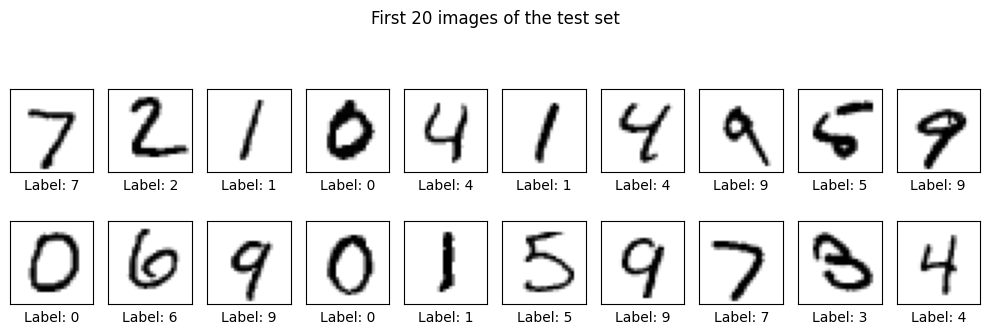

In [95]:
# 1. Loading data
from keras.datasets import mnist
import matplotlib.pyplot as plt

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Print the shape of the datasets and the number of classes
print(f"Train images shape: {train_images.shape}, Train labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}, Test labels shape: {test_labels.shape}")
nb_classes = len(set(train_labels))
print(f'Number of classes: {nb_classes}, Classes: {sorted(set(train_labels))}')

# 2. Visualization of a subset of the training set
n = 20  # Number of images to display
cols = min(n, 10)  # Number of columns (up to 10)
rows = (n // cols) + 1  # Number of rows

plt.figure(figsize=(cols, rows * 1.5))
for i in range(n):  # Display the first n images from the training set
    plt.subplot(rows, cols, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(f'Label: {train_labels[i]}')

plt.tight_layout()  # Improve spacing between images
plt.suptitle(f'First {n} images of the training set', y=1.02)
plt.subplots_adjust(top=0.88)
plt.show()

# 3. Visualization of a subset of the test set
plt.figure(figsize=(cols, rows * 1.5))
for i in range(n):  # Display the first n images from the test set
    plt.subplot(rows, cols, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(f'Label: {test_labels[i]}')

plt.tight_layout()  # Improve spacing between images
plt.suptitle(f'First {n} images of the test set', y=1.02)
plt.subplots_adjust(top=0.88)
plt.show()



In [96]:
# Flatten the images to 1D vectors and normalize the pixel values
train_images_mlp = train_images.reshape(train_images.shape[0], 28*28).astype('float32') / 255
test_images_mlp = test_images.reshape(test_images.shape[0], 28*28).astype('float32') / 255

# Convert labels to one-hot encoding
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)


In [97]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

# Create the MLP model
mlp_model = Sequential()
mlp_model.add(Dense(256, activation='relu', input_shape=(28*28,)))
mlp_model.add(Dropout(0.3))  # 30% dropout for regularization

# Second hidden layer with 128 neurons, ReLU activation
mlp_model.add(Dense(128, activation='relu'))
mlp_model.add(Dropout(0.3))
# Output layer with softmax activation for multi-class classification
mlp_model.add(Dense(10, activation='softmax'))

# Use RMSprop with a reduced learning rate (e.g., 0.001)
mlp_optimizer = RMSprop(learning_rate=0.001)

# Compile the model with the new optimizer
mlp_model.compile(optimizer=mlp_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])





/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [98]:
from keras.utils import plot_model, to_categorical

mlp_model.summary()


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_57 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_34 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_35 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [99]:
mlp_history = mlp_model.fit(train_images_mlp, train_labels, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8031 - loss: 0.6562 - val_accuracy: 0.9566 - val_loss: 0.1538
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9440 - loss: 0.1872 - val_accuracy: 0.9668 - val_loss: 0.1179
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9585 - loss: 0.1399 - val_accuracy: 0.9719 - val_loss: 0.0985
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9656 - loss: 0.1099 - val_accuracy: 0.9726 - val_loss: 0.0954
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9708 - loss: 0.0965 - val_accuracy: 0.9728 - val_loss: 0.0948


In [ ]:
# Reshape images to (28, 28, 1) and normalize the pixel values
train_images_cnn = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32') / 255
test_images_cnn = test_images.reshape(test_images.shape[0], 28, 28, 1).astype('float32') / 255


In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

# Create the CNN model
cnn_model = Sequential()

# First convolutional layer + max pooling
cnn_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer + max pooling
cnn_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the convolutional layers
cnn_model.add(Flatten())

# Fully connected layer
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.3))

# Output layer for 10 classes
cnn_model.add(Dense(10, activation='softmax'))

# Use RMSprop with a reduced learning rate (e.g., 0.001)
cnn_optimizer = RMSprop(learning_rate=0.001)

# Compile the model with the new optimizer
cnn_model.compile(optimizer=cnn_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn_history = cnn_model.fit(train_images_cnn, train_labels, epochs=5, batch_size=128, validation_split=0.2)

# Evaluate the CNN model on the test data
cnn_loss, cnn_accuracy = cnn_model.evaluate(test_images_cnn, test_labels)
print(f"CNN Test Accuracy: {cnn_accuracy}")



Epoch 1/5
 97/375 ━━━━━━━━━━━━━━━━━━━━ 32s 118ms/step - accuracy: 0.6208 - loss: 1.1598

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


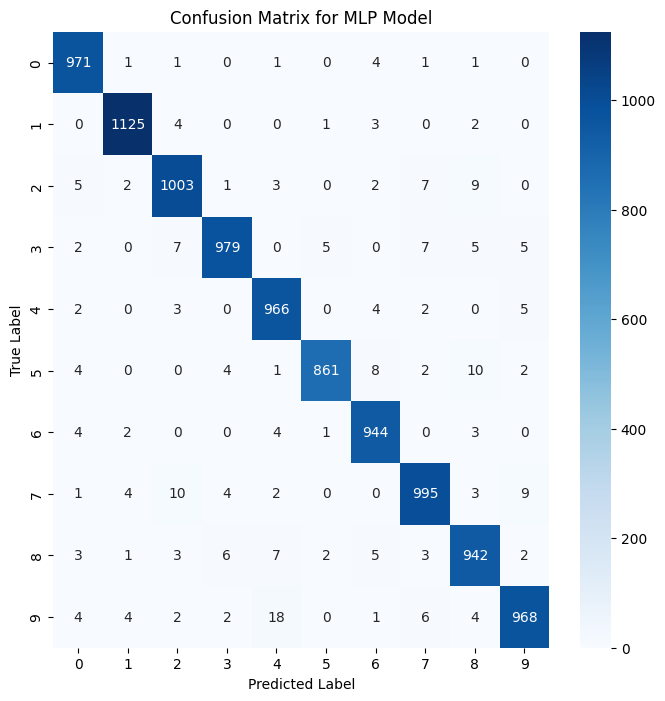

In [89]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict using MLP model
mlp_predictions = np.argmax(mlp_model.predict(test_images_mlp), axis=1)
y_true_mlp = np.argmax(test_labels, axis=1)

# Create confusion matrix for MLP model
mlp_cm = confusion_matrix(y_true_mlp, mlp_predictions)

# Plot confusion matrix for MLP
plt.figure(figsize=(8, 8))
sns.heatmap(mlp_cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.title("Confusion Matrix for MLP Model")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


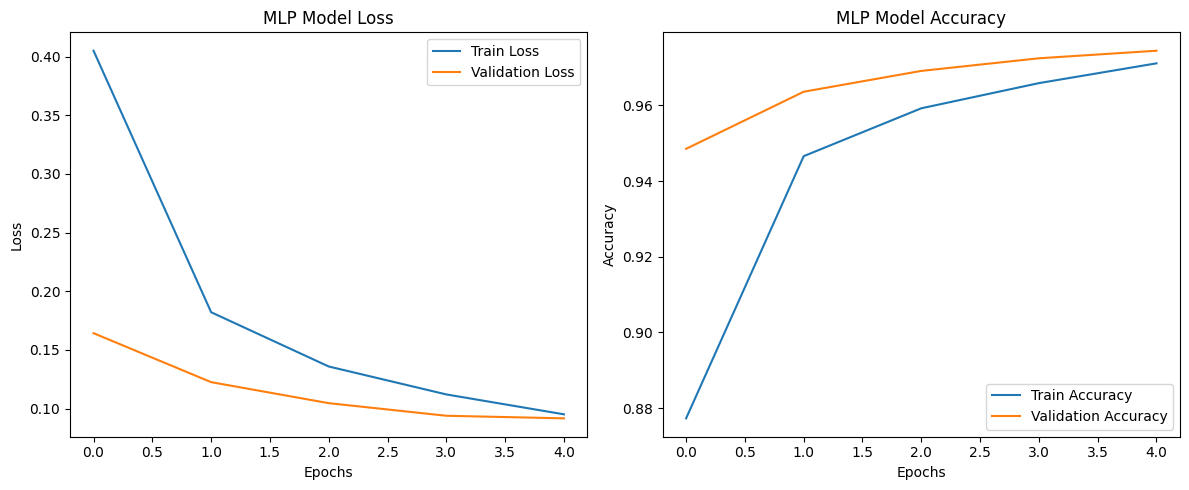

In [90]:
# Plot accuracy and loss curves for MLP
plt.figure(figsize=(12, 5))

# Plot the loss curve
plt.subplot(1, 2, 1)
plt.plot(mlp_history.history['loss'], label='Train Loss')
plt.plot(mlp_history.history['val_loss'], label='Validation Loss')
plt.title('MLP Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the accuracy curve
plt.subplot(1, 2, 2)
plt.plot(mlp_history.history['accuracy'], label='Train Accuracy')
plt.plot(mlp_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('MLP Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Plot accuracy and loss curves for MLP
plt.figure(figsize=(12, 5))

# Plot the loss curve
plt.subplot(1, 2, 1)
plt.plot(mlp_history.history['loss'], label='Train Loss')
plt.plot(mlp_history.history['val_loss'], label='Validation Loss')
plt.title('MLP Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the accuracy curve
plt.subplot(1, 2, 2)
plt.plot(mlp_history.history['accuracy'], label='Train Accuracy')
plt.plot(mlp_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('MLP Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


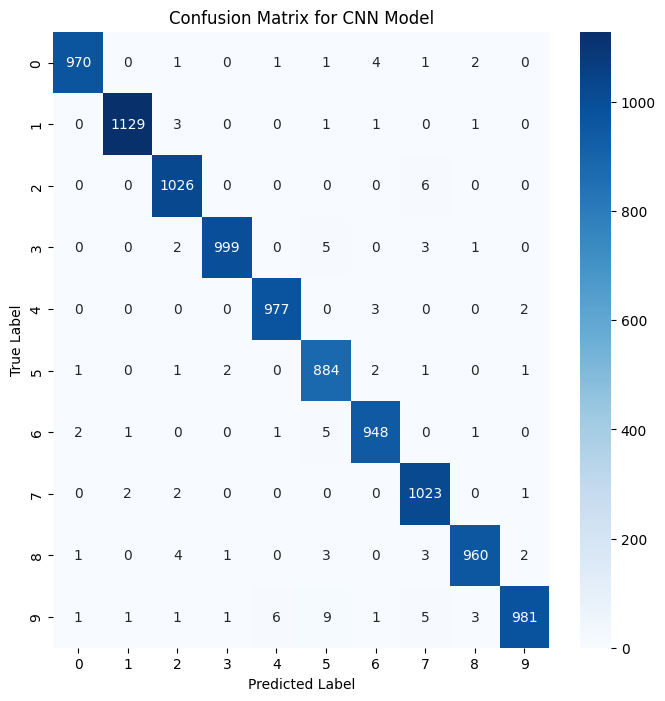

In [93]:
# Predict using CNN model
cnn_predictions = np.argmax(cnn_model.predict(test_images_cnn), axis=1)
y_true_cnn = np.argmax(test_labels, axis=1)

# Create confusion matrix for CNN model
cnn_cm = confusion_matrix(y_true_cnn, cnn_predictions)

# Plot confusion matrix for CNN
plt.figure(figsize=(8, 8))
sns.heatmap(cnn_cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.title("Confusion Matrix for CNN Model")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


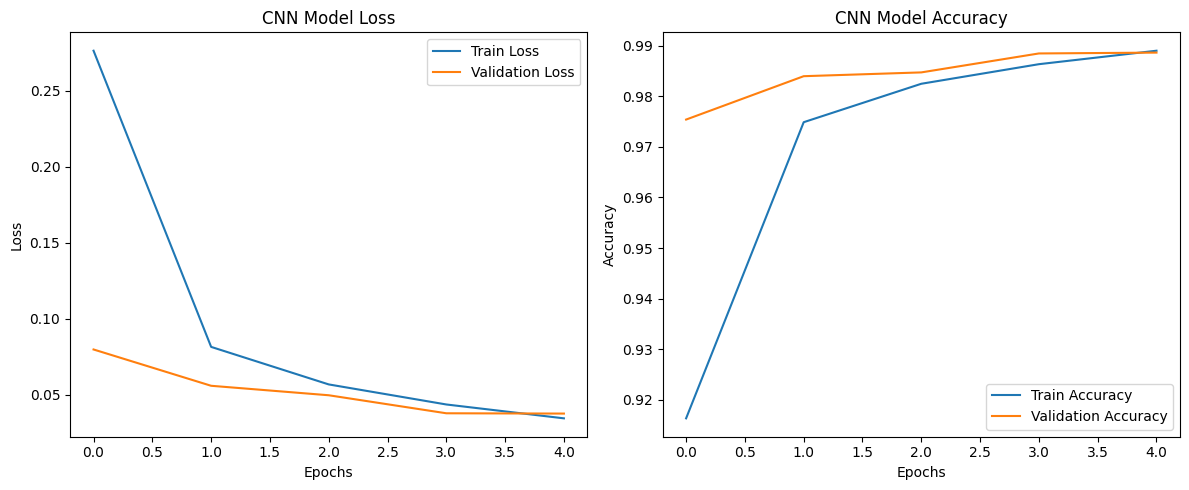

In [92]:
# Plot accuracy and loss curves for CNN
plt.figure(figsize=(12, 5))

# Plot the loss curve
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the accuracy curve
plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
